In [148]:
#mport packages
import numpy as np 
import pandas as pd 
import seaborn as sb 
import matplotlib.pyplot as plot 
import sklearn 
from pandas  import Series, DataFrame 
from pylab import rcParams 
from sklearn import preprocessing 
from sklearn.linear_model import LogisticRegression 
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import classification_report
import requests
import math

import os
os.chdir("C:\\Users\\HP\\Desktop\\Learning\\DataScience\\01Materials\\23.MACHINE LEARNING - 4\\Assignment")

In [149]:
# from six.moves.urllib.request import urlopen
# #Url= "https://raw.githubusercontent.com/BigDataGal/Python-for-DataScience/master/titanic-train.csv"
# response = requests.get(Url)
# print(response)

In [152]:
titanic_train = pd.read_csv("titanic_train.csv") 
titanic_test = pd.read_csv("titanic_train.csv") 

titanic_train.columns =  ['PassengerId','Survived','Pclass','Name','Sex','Age','SibSp','Parch','Ticket','Fare','Cabin','Embarked']
titanic_test.columns =  ['PassengerId','Survived','Pclass','Name','Sex','Age','SibSp','Parch','Ticket','Fare','Cabin','Embarked']

#You use only Pclass, Sex, Age, SibSp (Siblings aboard), Parch (Parents/children aboard), 
# and Fare to predict whether a passenger survived. 


In [153]:
titanic_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [154]:
titanic_train.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [155]:
#Check data types of each column
titanic_train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [156]:
# convert objects to numbers
#Get some basic information on the dataframe.
titanic_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [8]:
#Missing value treatment
#We can see that Age,Cabin,and Embarked have some missing values.

In [157]:
# Generating Descriptive statistics on the dataframe.
#You use only Pclass, Sex, Age, SibSp (Siblings aboard), Parch (Parents/children aboard), 
# and Fare to predict whether a passenger survived. 
titanic_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


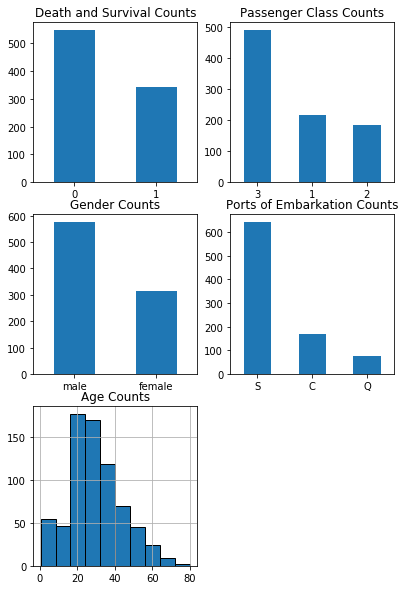

In [158]:
#You use only Pclass, Sex, Age, SibSp (Siblings aboard), Parch (Parents/children aboard), 
# and Fare to predict whether a passenger survived. Plot a few features.

# Setting the global default size of matplotlib figures.
plot.rc('figure',figsize=(10,5))

# Set up a grid of plots.
fig = plot.figure(figsize = (10,10))
fig_dims=(3,3)      # 3X2->3 rows,2columns

#titanic_train['Survived'].value_counts()
#0    549
#1    342
#Returns object containing counts of unique values.

# Plot Death and survival counts.
plot.subplot2grid(fig_dims,(0,0))
titanic_train['Survived'].value_counts().plot(kind='bar',title = 'Death and Survival Counts')
plot.xticks(rotation=0)

# Plot Pclass counts.
plot.subplot2grid(fig_dims,(0,1))
titanic_train['Pclass'].value_counts().plot(kind='bar',title = 'Passenger Class Counts')
plot.xticks(rotation=0)

# Plot Sex counts.
plot.subplot2grid(fig_dims,(1,0))
titanic_train['Sex'].value_counts().plot(kind='bar',title = 'Gender Counts')
plot.xticks(rotation=0)

# Plot Embarked counts.
plot.subplot2grid(fig_dims,(1,1))
titanic_train['Embarked'].value_counts().plot(kind='bar',title = 'Ports of Embarkation Counts')
plot.xticks(rotation=0)

# Plot Age counts.
plot.subplot2grid(fig_dims,(2,0))
titanic_train['Age'].hist(edgecolor='black')
plot.title('Age Counts')
plot.xticks(rotation=0)
plot.show()


In [159]:
#We will now explore features to view the impact on survival rates. Feature Engineering
# We will determine which proportion of passenger survive based on their passenger data.

pclass_ct = pd.crosstab(titanic_train['Pclass'],titanic_train['Survived'])
pclass_ct

Survived,0,1
Pclass,,
1,80,136
2,97,87
3,372,119


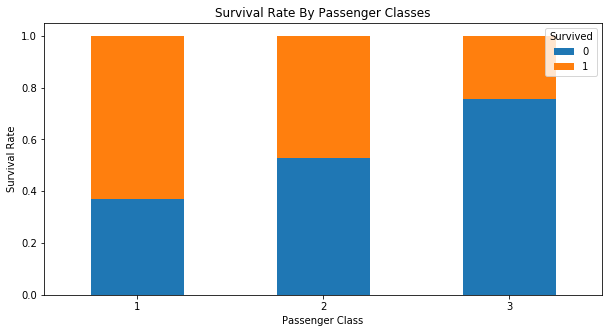

In [160]:
# Normalizing croos tab to sum to 1.
pclass_ct = pclass_ct.div(pclass_ct.sum(1).astype(float),axis=0)
pclass_ct.plot(kind='bar', stacked=True,  title='Survival Rate By Passenger Classes')

plot.xlabel('Passenger Class')
plot.ylabel('Survival Rate')
plot.xticks(rotation=0)
plot.show()

In [161]:
titanic_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [162]:
#We can see that passenger class have significant impact on whether the passenger survived or not. 
#Also, those in third class have higher chance for death, while those in first class have higher chance for survival. 
#So, we will consider this feature.
#Feature: Sex

# Here. the column sex is in string, we have to map it to number representation.

dictionary = {'male':1,'female':0}
titanic_train['Sex_Val'] = titanic_train['Sex'].map(dictionary).astype(int)
titanic_train.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_Val
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1


In [163]:
# We will determine which proportion of passenger survive based on their gender.
sex_ct = pd.crosstab(titanic_train['Sex_Val'],titanic_train['Survived'])
sex_ct

Survived,0,1
Sex_Val,,
0,81,233
1,468,109


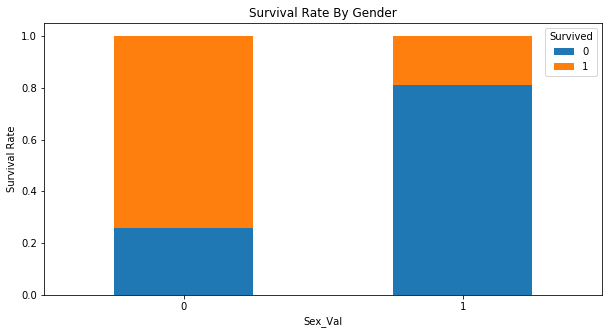

In [164]:
# Normalizing croos tab to sum to 1.
sex_ct = sex_ct.div(sex_ct.sum(1).astype(float),axis=0)
sex_ct.plot(kind='bar', stacked=True,  title='Survival Rate By Gender')

plot.xlabel('Sex_Val')
plot.ylabel('Survival Rate')
plot.xticks(rotation=0)
plot.show()


In [165]:
#Majority of female survived, but majority of males did not.

#Features: Sex And Passenger Class
# Now, we will see if we can gain any insight on survival rate by looking at both Sex and Pclasses i.e, to count male and 
# female in each classes.

passengers_classes = titanic_train['Pclass'].unique()
passengers_classes = sorted(passengers_classes)

print('Sex: Pclass Num')
for p_class in passengers_classes:
    print(' M:  ',p_class,'   ',len(titanic_train[(titanic_train['Sex']=='male') & (titanic_train['Pclass']==p_class)   ]))
    print(' F:  ',p_class,'   ', len(titanic_train[(titanic_train['Sex']=='female') & (titanic_train['Pclass']==p_class)   ]))


Sex: Pclass Num
 M:   1     122
 F:   1     94
 M:   2     108
 F:   2     76
 M:   3     347
 F:   3     144


Female
Survived   0   1
Pclass          
1          3  91
2          6  70
3         72  72 

Male
Survived    0   1
Pclass           
1          77  45
2          91  17
3         300  47


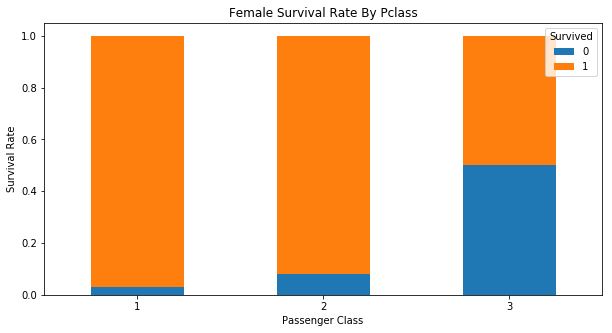

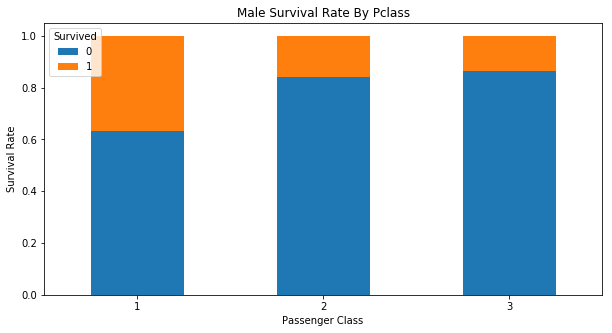

In [166]:
# After seeing the values of Pclass of both the genders, we will plot the survival rate by Sex and Pclass.
# Plot survival rate by Passenger class for female
titanic_train_female = titanic_train[titanic_train['Sex']=='female']
female_ct = pd.crosstab(titanic_train_female['Pclass'],titanic_train['Survived'])
print('Female')
print(female_ct,'\n')
female_ct = female_ct.div(female_ct.sum(1).astype(float),axis=0)
female_ct.plot(kind='bar', stacked=True,  title='Female Survival Rate By Pclass')
plot.xlabel('Passenger Class')
plot.ylabel('Survival Rate')
plot.xticks(rotation=0)

# Plot survival rate by Passenger class for male
titanic_train_male = titanic_train[titanic_train['Sex']=='male']
male_ct = pd.crosstab(titanic_train_male['Pclass'],titanic_train['Survived'])
print('Male')
print(male_ct)
male_ct = male_ct.div(male_ct.sum(1).astype(float),axis=0)
male_ct.plot(kind='bar', stacked=True,  title='Male Survival Rate By Pclass')
plot.xlabel('Passenger Class')
plot.ylabel('Survival Rate')
plot.xticks(rotation=0)
plot.show()


In [167]:
#Majority of females in 1st and 2nd class survived. Whereas, men have the highest chances of survival in 1st class only.

#Feature: Embarked
titanic_train['Embarked'].isnull().sum()

2

In [168]:
titanic_train[titanic_train['Embarked'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_Val
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN,0
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN,0


In [169]:
# Here, we have two values which are null.
# We need to fill it, inaddition, we have to map these strings to number.

In [170]:
# Get the unique values of Embarked
embarked_locs = titanic_train['Embarked'].unique()

dictionary = dict(zip(embarked_locs,range(0, len(embarked_locs) + 1)))
dictionary

{'S': 0, 'C': 1, 'Q': 2, nan: 3}

In [171]:
#dictionary = {nan: 0, 'C' : 1, 'Q' : 2, 'S' : 3 }
titanic_train['Embarked_Val']=titanic_train['Embarked'].map(dictionary).astype(int)
titanic_train[titanic_train['Embarked'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_Val,Embarked_Val
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN,0,3
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN,0,3


In [172]:
titanic_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_Val,Embarked_Val
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1,0


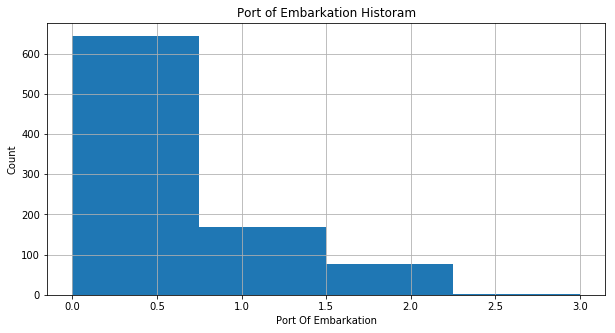

In [173]:
#All data set let us plot histogram for Embarked_Val.
titanic_train['Embarked_Val'].hist(bins=len(embarked_locs),range=(0,3))
plot.title('Port of Embarkation Historam')
plot.xlabel('Port Of Embarkation')
plot.ylabel('Count')
plot.show()

<Figure size 72x72 with 0 Axes>

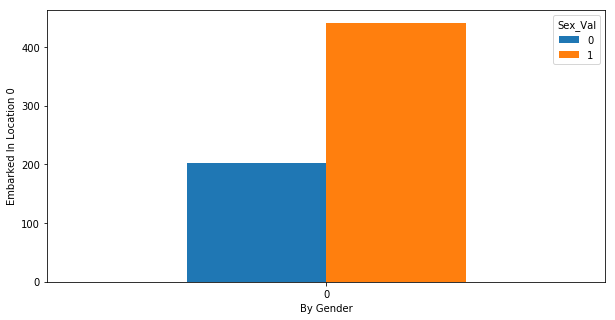

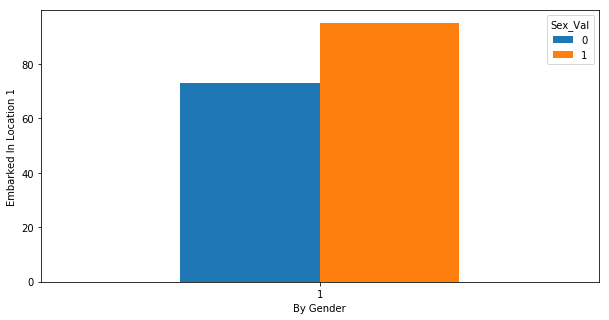

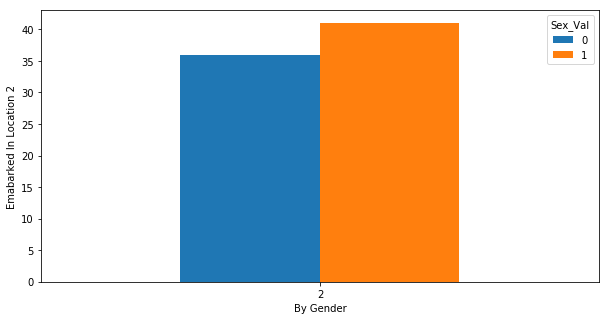

In [174]:
#Those who embarked in location 'C':1, have higher rate of survival.
#Now, We will plot a graph to determine gender and passenger class makeup for each port.
fig = plot.figure(figsize=(1,1))
#{'C': 1, 'Q': 2, 'S': 0}
#dictionary = {'male':1,'female':0}

# Graph for gender and embarkation location at location 'S':0.
embarkedLocation = 0
titanic_train_embarked_0  = titanic_train[titanic_train['Embarked_Val'] == embarkedLocation]
embarked_0_ct = pd.crosstab(titanic_train_embarked_0['Embarked_Val'],titanic_train['Sex_Val'])

#print(embared_0_ct,'\n')
#plot.subplot2grid((2,3),(0,0))
embarked_0_ct.plot(kind='bar')
plot.xlabel('By Gender')
plot.ylabel('Embarked In Location %d' %(embarkedLocation))
plot.xticks(rotation=0)
plot.show()
embarkedLocation=embarkedLocation+1

# Graph for gender and embarkation location at location 'C':1.
titanic_train_embarked_1 = titanic_train[titanic_train['Embarked_Val'] == embarkedLocation]
embarked_1_ct = pd.crosstab(titanic_train_embarked_1['Embarked_Val'],titanic_train['Sex_Val'])

#print(embared_0_ct,'\n')
#plot.subplot2grid((2,3),(0,0))
embarked_1_ct.plot(kind='bar')
plot.xlabel('By Gender')
plot.ylabel('Embarked In Location %d' %(embarkedLocation))
plot.xticks(rotation=0)
plot.show()

embarkedLocation=embarkedLocation+1

# Graph for gender and embarkation location at location 'Q':2.
titanic_train_embarked_2 = titanic_train[titanic_train['Embarked_Val'] == embarkedLocation]
embarked_2_ct = pd.crosstab(titanic_train_embarked_2['Embarked_Val'],titanic_train['Sex_Val'])

#print(embared_0_ct,'\n')
#plot.subplot2grid((2,3),(0,0))
embarked_2_ct.plot(kind='bar')
plot.xlabel('By Gender')
plot.ylabel('Emabarked In Location %d' %(embarkedLocation))
plot.xticks(rotation=0)
plot.show()

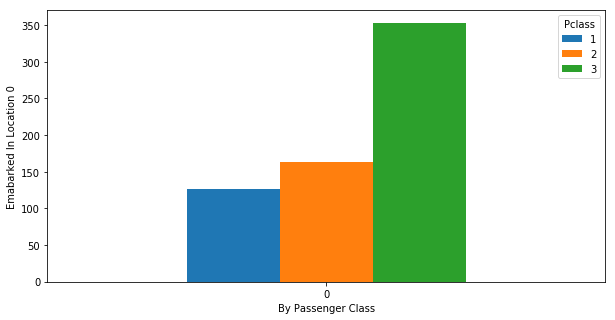

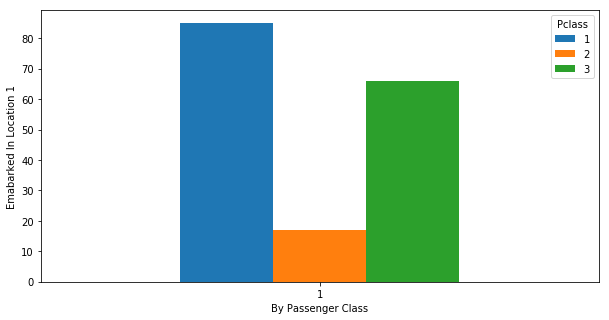

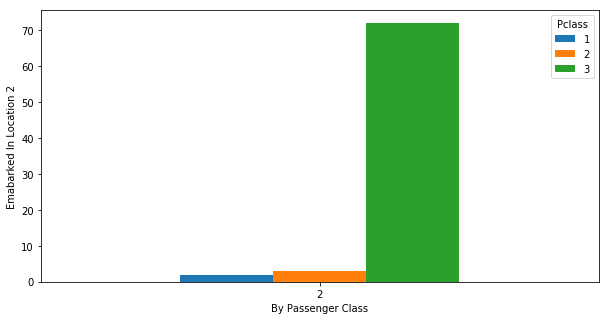

In [175]:
# Graph for gender and embarkation location at location 'S':0.
embarkedLocation = 0
titanic_train_embarked_0 = titanic_train[titanic_train['Embarked_Val'] == embarkedLocation]
embarked_0_ct = pd.crosstab(titanic_train_embarked_0['Embarked_Val'],titanic_train['Pclass'])

#print(embared_0_ct,'\n')
#plot.subplot2grid((2,3),(0,0))
embarked_0_ct.plot(kind='bar')
plot.xlabel('By Passenger Class')
plot.ylabel('Emabarked In Location %d' %(embarkedLocation))
plot.xticks(rotation=0)
plot.show()
embarkedLocation=embarkedLocation+1


titanic_train_embarked_1 = titanic_train[titanic_train['Embarked_Val'] == embarkedLocation]
embarked_1_ct = pd.crosstab(titanic_train_embarked_1['Embarked_Val'],titanic_train['Pclass'])

#print(embared_0_ct,'\n')
#plot.subplot2grid((2,3),(0,0))
embarked_1_ct.plot(kind='bar')
plot.xlabel('By Passenger Class')
plot.ylabel('Emabarked In Location %d' %(embarkedLocation))
plot.xticks(rotation=0)
plot.show()
embarkedLocation=embarkedLocation+1



titanic_train_embarked_2_ = titanic_train[titanic_train['Embarked_Val'] == embarkedLocation]
embarked_2_ct = pd.crosstab(titanic_train_embarked_2['Embarked_Val'],titanic_train['Pclass'])

#print(embared_0_ct,'\n')
#plot.subplot2grid((2,3),(0,0))
embarked_2_ct.plot(kind='bar')
plot.xlabel('By Passenger Class')
plot.ylabel('Emabarked In Location %d' %(embarkedLocation))
plot.xticks(rotation=0)
plot.show()



In [176]:
titanic_train =pd.concat([titanic_train,pd.get_dummies(titanic_train['Embarked_Val'],prefix='Embarked_Val')],axis=1)


In [177]:
#Age :  Filter to view missing values.
titanic_train[titanic_train['Age'].isnull()][['Sex','Pclass','Age']].head()

,Sex,Pclass,Age
5,male,3,NaN
17,male,2,NaN
19,female,3,NaN
26,male,3,NaN
28,female,3,NaN


In [178]:
# Determine age typical for each passenger class by Sex_Val.We will use the median intead of mean.
titanic_train['AgeFill']=titanic_train['Age']

titanic_train['AgeFill']=titanic_train['AgeFill'].groupby([titanic_train['Sex_Val'],titanic_train['Pclass']]).apply(lambda x:x.fillna(x.median()))

In [179]:
# As we have filled with median should not have any null values, but check if AgeFill does not contain any missing values.
titanic_train['AgeFill'].isnull().sum()

0

C:\Users\HP\Anaconda3\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\HP\Anaconda3\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


Text(0, 0.5, 'Age')

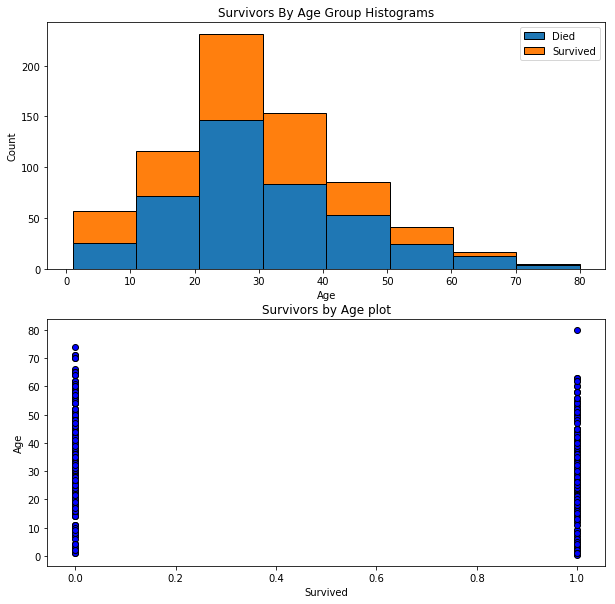

In [180]:
# Histogram of agefill segmented by survivor.
fi, ax = plot.subplots(2,1,figsize=(10,10))
bin_size = 10
data1 = titanic_train[titanic_train['Survived'] == 0]['Age']
data2 = titanic_train[titanic_train['Survived'] == 1]['Age']
max_age = max(titanic_train['AgeFill'])
bins=(int)(max_age/bin_size)

ax[0].hist([data1,data2],edgecolor='black', range = (1, max_age),bins=bins, stacked = True)
ax[0].legend(('Died','Survived'),loc='best')
ax[0].set_title('Survivors By Age Group Histograms')
ax[0].set_xlabel('Age')
ax[0].set_ylabel('Count')

# Scatter plot survived and AgeFill
ax[1].scatter(titanic_train['Survived'],titanic_train['AgeFill'],edgecolor='black',facecolor='blue')
ax[1].set_title('Survivors by Age plot')
ax[1].set_xlabel('Survived')
ax[1].set_ylabel('Age')

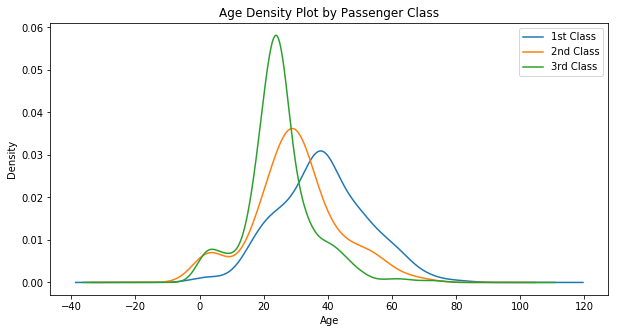

In [181]:
#We will keep on digging further, because, above graph do not seems to clearly show any insigts, 
#it shows only survived(1) or not survived(0).
#Plot AgeFill density by Pclass.
for pclass in passengers_classes:
    titanic_train.AgeFill[titanic_train.Pclass == pclass].plot(kind='kde')
plot.title('Age Density Plot by Passenger Class')
plot.xlabel('Age')
plot.legend(('1st Class', '2nd Class', '3rd Class'), loc='best')

In [182]:
# When looking at AgeFill density by Pclass, we see the first class passengers were generally older then second class passengers,
# which in turn were older than third class passengers. We have determined that 
# first class passengers had a higher survival rate than second class passengers, 
# which in turn had a higher survival rate than third class passengers.

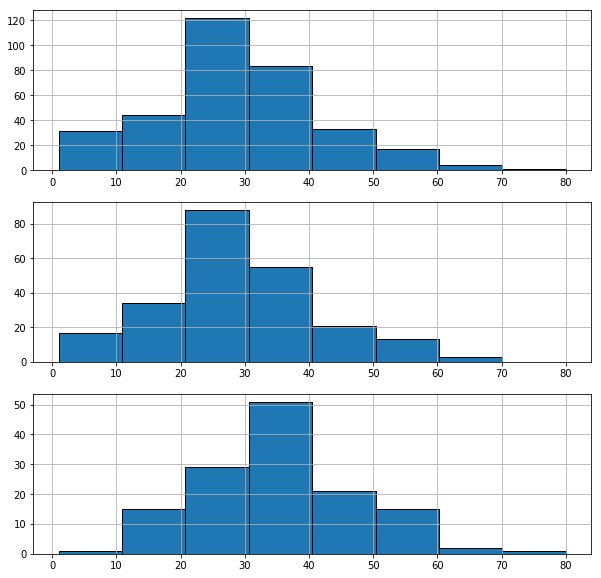

In [183]:
fig = plot.figure(figsize=(10,10))

# Plot the AgeFill histogram for Survivors
plot.subplot2grid((3,1),(0,0))
titanic_train_survived = titanic_train[titanic_train['Survived']==1]
titanic_train_survived['AgeFill'].hist(range=(1,max_age),bins=bins,edgecolor='black')

# Plot the AgeFill histogram for Females
plot.subplot2grid((3,1),(1,0))
titanic_train_survived = titanic_train[(titanic_train['Sex_Val']==0) & (titanic_train['Survived']==1)]
titanic_train_survived['AgeFill'].hist(range=(1,max_age),bins=bins,edgecolor='black')

# Plot the AgeFill histogram for first class passengers
plot.subplot2grid((3,1),(2,0))
titanic_train_survived = titanic_train[(titanic_train['Pclass']==1) & (titanic_train['Survived']==1)]
titanic_train_survived['AgeFill'].hist(range=(1,max_age),bins=bins,edgecolor='black')
plot.show()

In [184]:
#In the first graph, we see that most survivors come from the 20s to 30s age ranges and might be explained 
#by the following two graphs. The second graph shows most females are within their 20s. 
#The third graph shows most first class passengers are within their 30s.

In [185]:
# Features: Family Size
# We wil now try to create new features or modify the existing features 
# which might be advantageous to a machuine learning alorgithm.

In [186]:
# Lets create a new feature,FamilySize, that is a sum of parch(number of parents/cildren on board) and 
# sibsp(number of sibling or spouse).
titanic_train['FamilySize'] = titanic_train['Parch'] + titanic_train['SibSp']
titanic_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_Val,Embarked_Val,Embarked_Val_0,Embarked_Val_1,Embarked_Val_2,Embarked_Val_3,AgeFill,FamilySize
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1,0,1,0,0,0,22.0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0,1,0,1,0,0,38.0,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,0,1,0,0,0,26.0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0,0,1,0,0,0,35.0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1,0,1,0,0,0,35.0,0


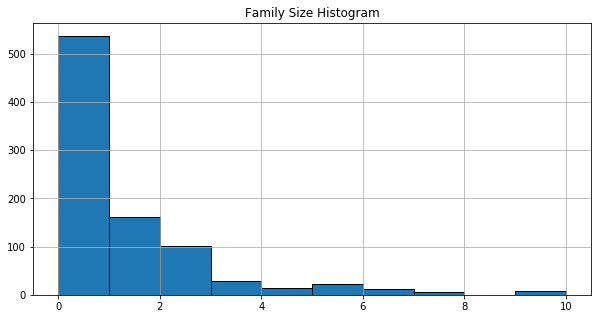

In [187]:
titanic_train['FamilySize'].hist(edgecolor = 'black')
plot.title('Family Size Histogram')
plot.show()

In [188]:
# Plot unique values of Family and its maximum.
family_size = sorted(titanic_train['FamilySize'].unique())
sorted(family_size)

[0, 1, 2, 3, 4, 5, 6, 7, 10]

C:\Users\HP\Anaconda3\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\HP\Anaconda3\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


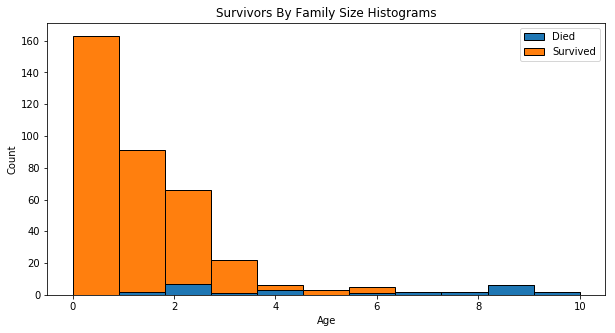

In [189]:
# data1 = titanic_train[titanic_train['Survived'] == 0]['FamilySize']
data2 = titanic_train[titanic_train['Survived'] == 1]['FamilySize']
family_size_max = max(family_size)
bins=(int)(family_size_max+1)

fig, ax = plot.subplots()
plot.hist([data1,data2],edgecolor = 'black', range = (0, family_size_max),bins=bins, stacked = True)
ax.legend(('Died','Survived'),loc = 'best')
ax.set_title('Survivors By Family Size Histograms')
ax.set_xlabel('Age')
ax.set_ylabel('Count')
plot.show()

In [190]:
# Feature: Name
titanic_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_Val,Embarked_Val,Embarked_Val_0,Embarked_Val_1,Embarked_Val_2,Embarked_Val_3,AgeFill,FamilySize
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1,0,1,0,0,0,22.0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0,1,0,1,0,0,38.0,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,0,1,0,0,0,26.0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0,0,1,0,0,0,35.0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1,0,1,0,0,0,35.0,0


In [191]:
# We will extract the titles from the names(for eg. Mr., Mrs., Royalty etc)
titles=set()
for names in titanic_train['Name']:
    titles.add(names.split(',')[1].split('.')[0].strip())
titles

{'Capt',
 'Col',
 'Don',
 'Dr',
 'Jonkheer',
 'Lady',
 'Major',
 'Master',
 'Miss',
 'Mlle',
 'Mme',
 'Mr',
 'Mrs',
 'Ms',
 'Rev',
 'Sir',
 'the Countess'}

In [192]:
# Lets create a dictionary so that we can map titles into the one in dictionary.

Title_Dictionary = {
    "Capt": "Officer",
    "Col": "Officer",
    "Major": "Officer",
    "Jonkheer": "Royalty",
    "Don": "Royalty",
    "Sir" : "Royalty",
    "Dr": "Officer",
    "Rev": "Officer",
    "the Countess":"Royalty",
    "Mme": "Mrs",
    "Mlle": "Miss",
    "Ms": "Mrs",
    "Mr" : "Mr",
    "Mrs" : "Mrs",
    "Miss" : "Miss",
    "Master" : "Master",
    "Lady" : "Royalty"
}


In [193]:
titanic_train["Title"] = titanic_train["Name"].map(lambda name:name.split(',')[1].split('.')[0].strip())
titanic_train["Title"] = titanic_train["Title"].map(Title_Dictionary)
titanic_train["Title"].isnull().sum()


0

In [194]:
# So, now, we will create dummy variables of column titles.

titanic_train=pd.concat([titanic_train,pd.get_dummies(titanic_train['Title'],prefix='Titles_')],axis=1)
titanic_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 27 columns):
PassengerId        891 non-null int64
Survived           891 non-null int64
Pclass             891 non-null int64
Name               891 non-null object
Sex                891 non-null object
Age                714 non-null float64
SibSp              891 non-null int64
Parch              891 non-null int64
Ticket             891 non-null object
Fare               891 non-null float64
Cabin              204 non-null object
Embarked           889 non-null object
Sex_Val            891 non-null int32
Embarked_Val       891 non-null int32
Embarked_Val_0     891 non-null uint8
Embarked_Val_1     891 non-null uint8
Embarked_Val_2     891 non-null uint8
Embarked_Val_3     891 non-null uint8
AgeFill            891 non-null float64
FamilySize         891 non-null int64
Title              891 non-null object
Titles__Master     891 non-null uint8
Titles__Miss       891 non-null uint8
Titles__M

In [195]:
titanic_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,Embarked_Val_3,AgeFill,FamilySize,Title,Titles__Master,Titles__Miss,Titles__Mr,Titles__Mrs,Titles__Officer,Titles__Royalty
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,...,0,22.0,1,Mr,0,0,1,0,0,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,...,0,38.0,1,Mrs,0,0,0,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,...,0,26.0,0,Miss,0,1,0,0,0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,...,0,35.0,1,Mrs,0,0,0,1,0,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,...,0,35.0,0,Mr,0,0,1,0,0,0


In [196]:
# Feature: Cabin
#titanic_train['Cabin'].isnull().sum()
# A cabin number looks like ‘C123’ and the letter refers to the deck. Therefore we’re going to extract these and 
# create a new feature, that contains a persons deck.
#titanic_train['Cabin'].head()
# First, need to fill in the NaN values.
#titanic_train['Cabin'] = titanic_train['Cabin'].fillna('U0')
#titanic_train['Cabin'].head()

In [197]:
"""
import re
titanic_train['Deck']=0
data_Frame_Len = titanic_train.shape[0]

for i in range(data_Frame_Len):
    titanic_train['Deck'][i]=re.sub(r'[0-9]+', '', titanic_train['Cabin'][i])
titanic_train['Deck']
"""

"\nimport re\ntitanic_train['Deck']=0\ndata_Frame_Len = titanic_train.shape[0]\n\nfor i in range(data_Frame_Len):\n    titanic_train['Deck'][i]=re.sub(r'[0-9]+', '', titanic_train['Cabin'][i])\ntitanic_train['Deck']\n"

In [198]:
"""
# From above we see that there are some values with multiple alphabets.
# They are:
data_Frame_Len = titanic_train.shape[0]
print('In these positions, we have one or more values.')
print('Pos','-','First',' ','Word')
for i in range(data_Frame_Len):
    size=titanic_train['Deck'][i]
    if(len(size) >1):
        print(i,'-',size[0],' and ',size)
"""

"\n# From above we see that there are some values with multiple alphabets.\n# They are:\ndata_Frame_Len = titanic_train.shape[0]\nprint('In these positions, we have one or more values.')\nprint('Pos','-','First',' ','Word')\nfor i in range(data_Frame_Len):\n    size=titanic_train['Deck'][i]\n    if(len(size) >1):\n        print(i,'-',size[0],' and ',size)\n"

In [199]:
"""
Deck = {"A": 1, "B": 2, "C": 3, "D": 4, "E": 5, "F": 6, "G": 7, "U": 8}

titanic_train['Deck'] = titanic_train['Cabin'].map(lambda x: re.compile("([a-zA-Z]+)").search(x).group())
titanic_train['Deck'] = titanic_train['Deck'].map(Deck)
titanic_train['Deck'] = titanic_train['Deck'].fillna(0)
titanic_train['Deck'] = titanic_train['Deck'].astype(int)


titanic_train['Deck'].isnull().sum()
"""

'\nDeck = {"A": 1, "B": 2, "C": 3, "D": 4, "E": 5, "F": 6, "G": 7, "U": 8}\n\ntitanic_train[\'Deck\'] = titanic_train[\'Cabin\'].map(lambda x: re.compile("([a-zA-Z]+)").search(x).group())\ntitanic_train[\'Deck\'] = titanic_train[\'Deck\'].map(Deck)\ntitanic_train[\'Deck\'] = titanic_train[\'Deck\'].fillna(0)\ntitanic_train[\'Deck\'] = titanic_train[\'Deck\'].astype(int)\n\n\ntitanic_train[\'Deck\'].isnull().sum()\n'

In [200]:
# Accuracy decreases significantly after using Cabin column.

In [201]:
# Final Data Preparation For Machine Learning

In [202]:
# Many Machine Learning algorithms do not work on strings and usually require data to be in an array,not dataFrame.
# Drop only the column of type object.
titanic_train.dtypes[titanic_train.dtypes.map(lambda x: x == 'object')]

Name        object
Sex         object
Ticket      object
Cabin       object
Embarked    object
Title       object
dtype: object

In [203]:
# Drop the object we wont use.
titanic_train = titanic_train.drop(['Name','Sex','Ticket','Cabin','Embarked','Title'],axis=1)
titanic_train.dtypes
# Drop Age column since we will be using AgeFill column.
# Drop SibSp and Parch column. We will be using FamilySize column.
# Drop passenerId column, since it will not be used as a feature.
# Embarked_Val since,we will use dummy variables instead.

PassengerId          int64
Survived             int64
Pclass               int64
Age                float64
SibSp                int64
Parch                int64
Fare               float64
Sex_Val              int32
Embarked_Val         int32
Embarked_Val_0       uint8
Embarked_Val_1       uint8
Embarked_Val_2       uint8
Embarked_Val_3       uint8
AgeFill            float64
FamilySize           int64
Titles__Master       uint8
Titles__Miss         uint8
Titles__Mr           uint8
Titles__Mrs          uint8
Titles__Officer      uint8
Titles__Royalty      uint8
dtype: object

In [204]:
titanic_train = titanic_train.drop(['PassengerId','Age','SibSp','Parch','Embarked_Val'],axis=1)
titanic_train.dtypes

Survived             int64
Pclass               int64
Fare               float64
Sex_Val              int32
Embarked_Val_0       uint8
Embarked_Val_1       uint8
Embarked_Val_2       uint8
Embarked_Val_3       uint8
AgeFill            float64
FamilySize           int64
Titles__Master       uint8
Titles__Miss         uint8
Titles__Mr           uint8
Titles__Mrs          uint8
Titles__Officer      uint8
Titles__Royalty      uint8
dtype: object

In [205]:
#Convert the dataFrame to a numpy array.
trainDataOnModel = titanic_train.values
trainDataOnModel
#titanic_train.head()

array([[ 0.    ,  3.    ,  7.25  , ...,  0.    ,  0.    ,  0.    ],
       [ 1.    ,  1.    , 71.2833, ...,  1.    ,  0.    ,  0.    ],
       [ 1.    ,  3.    ,  7.925 , ...,  0.    ,  0.    ,  0.    ],
       ...,
       [ 0.    ,  3.    , 23.45  , ...,  0.    ,  0.    ,  0.    ],
       [ 1.    ,  1.    , 30.    , ...,  0.    ,  0.    ,  0.    ],
       [ 0.    ,  3.    ,  7.75  , ...,  0.    ,  0.    ,  0.    ]])

In [206]:
#Data Wrangling dunction
#Below, is a summary of the data wranling we we performed on training set. 
#We will need to do the same operations to our trainig set.

from numpy import nan

def CleanData(data_Frame,drop_passenger_id):
    
    #Generate the mappin of sex from a string to a number representation.
    dictionary = {'male':1,'female':0}
    data_Frame['Sex_Val'] = data_Frame['Sex'].map(dictionary).astype(int)
    
    #Get the unique value of embarked.
    embarked_locs = data_Frame['Embarked'].unique()
    
    #Generate the mapping of sex from a string to a number representation.
    dictionary = dict(zip(embarked_locs,range(0, len(embarked_locs) + 1)))
    data_Frame['Embarked_Val']=data_Frame['Embarked'].map(dictionary).astype(int)

    #Transform embarked into dummy variables.
    data_Frame=pd.concat([data_Frame,pd.get_dummies(data_Frame['Embarked_Val'],prefix='Embarked_Val')],axis=1)

    #assign the missing values in Embarked to 'S'
    if(len(data_Frame[data_Frame['Embarked'].isnull()] > 0)):
        data_Frame.replace({'Embarked_Val' : { dictionary[nan] : dictionary['S']}},inplace=True )
    
    #Fill in missing values of fare with average fare.
    if(len(data_Frame[data_Frame['Fare'].isnull()] > 0)):
        av_Fare=data_Frame['Fare'].mean()
        data_Frame.replace({None:av_Fare},inplace=True)
        
    # Determine age typical for each passenger class by Sex_Val.We will use the median intead of mean.
    data_Frame['AgeFill']=data_Frame['Age']

    data_Frame['AgeFill']=data_Frame['AgeFill'].groupby([titanic_train['Sex_Val'],titanic_train['Pclass']]).apply(lambda x:x.fillna(x.median()))    

    # Lets create a new feature,FamilySize, that is a sum of parch(number of parents/cildren on board) and 
    # sibsp(number of sibling or spouse).
    data_Frame['FamilySize']=data_Frame['Parch']+data_Frame['SibSp']
    
    # We will extract the titles from the names(for eg. Mr., Mrs., Royalty etc)
    
    title=set()
    for names in data_Frame['Name']:
        title.add(names.split(',')[1].split('.')[0].strip())
    #print(title)
    
    data_Frame["Title"] = data_Frame["Name"].map(lambda name:name.split(',')[1].split('.')[0].strip())
    data_Frame["Title"] = data_Frame["Title"].map(Title_Dictionary)
    data_Frame = pd.concat([data_Frame,pd.get_dummies(data_Frame['Title'],prefix='Titles_')],axis=1)
    data_Frame["Titles__Royalty"]=0
        
    # Drop the object we wont use.
    data_Frame = data_Frame.drop(['Name','Sex','Ticket','Cabin','Embarked','Embarked_Val','Title'],axis=1)
    
    # Drop Age column since we will be using AgeFill column.
    # Drop SibSp and Parch column. We will be using FamilySize column.
    # Drop passenerId column, since it will not be used as a feature.
    data_Frame = data_Frame.drop(['Age','SibSp','Parch'],axis=1)

    
    if drop_passenger_id:
        data_Frame = data_Frame.drop(['PassengerId'],axis=1)
    
    return data_Frame

In [207]:
#Feature selection
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel

clf = RandomForestClassifier(n_estimators=50,max_features='sqrt')

# Fit the training data and create the decision trees.
train_features = titanic_train.iloc[:,1:]   # Excluding Survive column.
train_target = titanic_train.iloc[:,0]       # Only survive column.

# Fit the model to our training data.
clf = clf.fit(train_features,train_target)

In [208]:
features=pd.DataFrame()
features['feature']=train_features.columns
features['importance']=clf.feature_importances_
features.sort_values(by = ['importance'], ascending = True, inplace = True)
features.set_index('feature',inplace=True)

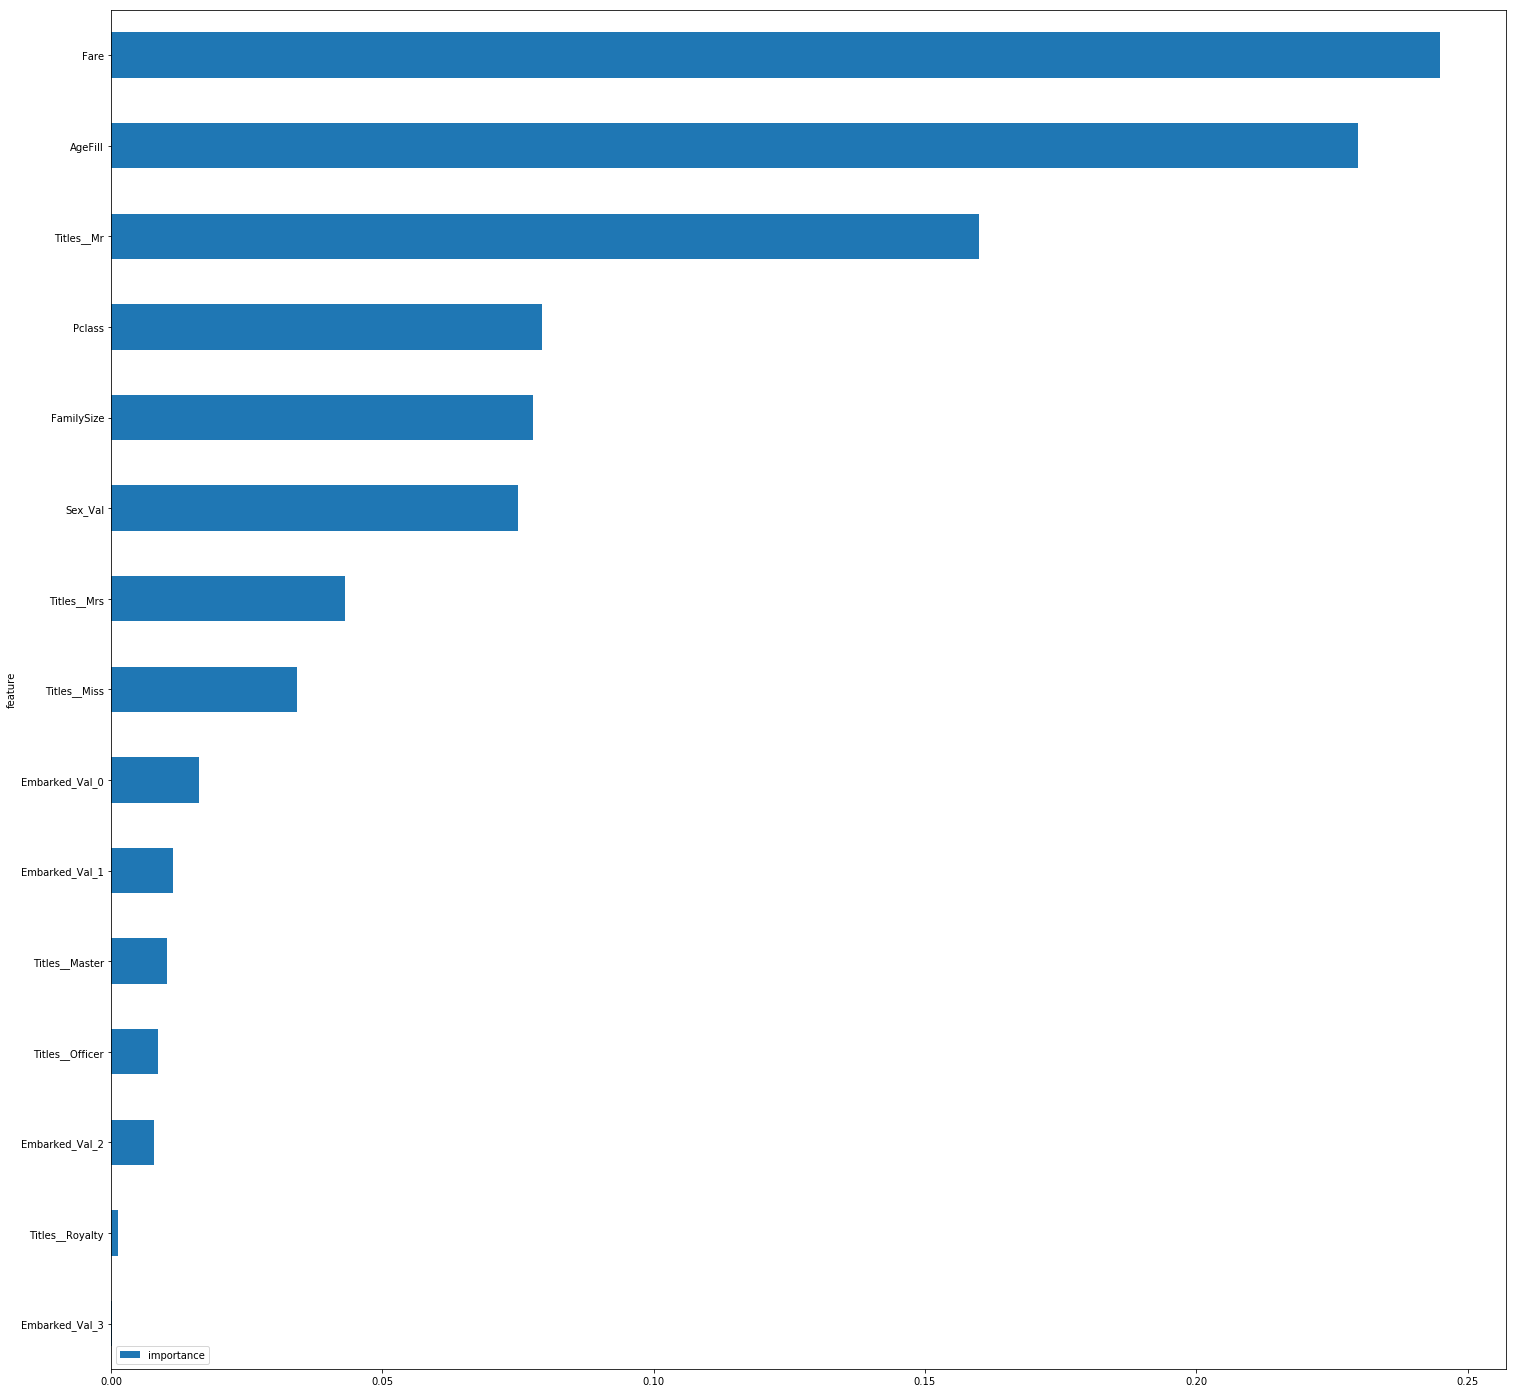

In [209]:
features.plot(kind='barh',figsize=(25,25))

In [210]:
model=SelectFromModel(clf,prefit=True)
train_reduced=model.transform(train_features)
print(train_reduced.shape)

(891, 6)


In [211]:
# Total features coming out to be 6.
# We will still continue with our original features.
# From above graph we see that feature 'Fare',is the most important one, along wit the 'age', 'Sex_Val', 'Family_size',
# 'Titles_Mr.'. Title_Royalty is the least important, which can be seen from the test set,that 
#there are no passenger who have the 
# title of being royalty which are:{"Jonkheer","Don","Sir","the Countess","Lady"}


In [212]:
#Random Forest
#Training: Random Forest
# Creating random forest object
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=100)

In [213]:
# Fit the training data and create the decision trees.
train_features = trainDataOnModel[:,1:]   # Excluding Survive column.
train_target = trainDataOnModel[:,0]       # Only survive column.

# Fit the model to our training data.
clf = clf.fit(train_features,train_target)
score = clf.score(train_features,train_target)
print('Mean accuracy of Random Forest: %f' %(score))

Mean accuracy of Random Forest: 0.983165


In [216]:
## Predicting: Random Forest
# Now, we will get into test data.
titanic_test.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [217]:
 if(len(titanic_test[titanic_test['Fare'].isnull()] > 0)):
        av_Fare=titanic_test['Fare'].mean()
        titanic_test.replace({None:av_Fare},inplace=True)

In [218]:
# Now, we will clean the ytest data(Data wrangle the test).

titanic_test = CleanData(titanic_test,drop_passenger_id=False)

# Convert it to numpy.
testDataOnModel = titanic_test.values
#data_test

TypeError: '>' not supported between instances of 'str' and 'int'

In [65]:
testDataOnModel

array([[8.92000e+02, 3.00000e+00, 7.82920e+00, ..., 0.00000e+00,
        0.00000e+00, 0.00000e+00],
       [8.93000e+02, 3.00000e+00, 7.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 0.00000e+00],
       [8.94000e+02, 2.00000e+00, 9.68750e+00, ..., 0.00000e+00,
        0.00000e+00, 0.00000e+00],
       ...,
       [1.30700e+03, 3.00000e+00, 7.25000e+00, ..., 0.00000e+00,
        0.00000e+00, 0.00000e+00],
       [1.30800e+03, 3.00000e+00, 8.05000e+00, ..., 0.00000e+00,
        0.00000e+00, 0.00000e+00],
       [1.30900e+03, 3.00000e+00, 2.23583e+01, ..., 0.00000e+00,
        0.00000e+00, 0.00000e+00]])

In [68]:
# Take the decision tree, and convert it to numpy array.
x_test = testDataOnModel[:,1:]

#predict the survival values  for the test data
y_test = clf.predict(x_test).astype(int)


ValueError: Number of features of the model must match the input. Model n_features is 15 and input n_features is 14 

In [67]:
# Create a dataFrame by combining index from the test data with the output of predictions, then write the results to the output:
data_test['Survived']=y_test
data_test[['PassengerId','Survived']].to_csv('result1.csv',index=False)

NameError: name 'y_test' is not defined

In [113]:
#To get idea of accuracy.
from sklearn import metrics
from sklearn.model_selection import train_test_split

train_x,test_x,train_y,test_y=train_test_split(train_features,train_target,test_size=0.20,random_state=0)

print(train_features.shape,train_target.shape)
print(train_x.shape,train_y.shape)
print(test_x.shape,test_y.shape)

(891, 15) (891,)
(712, 15) (712,)
(179, 15) (179,)


In [114]:
clf=clf.fit(train_x,train_y)
predict_y=clf.predict(test_x)

from sklearn.metrics import accuracy_score
print('Accuracy: %.2f'%(accuracy_score(test_y,predict_y)))

Accuracy: 0.83


In [115]:
model_score=clf.score(test_x,test_y)
print("Model Score %0.2f\n" %(model_score))

confusion_matrix = metrics.confusion_matrix(test_y,predict_y)
print ("Confusion Matrix ", confusion_matrix)

print ("          Predicted")
print ("         |  0  |  1  |")
print ("         |-----|-----|")
print ("       0 | %3d | %3d |" % (confusion_matrix[0, 0],
                                   confusion_matrix[0, 1]))
print ("Actual   |-----|-----|")
print ("       1 | %3d | %3d |" % (confusion_matrix[1, 0],
                                   confusion_matrix[1, 1]))
print ("         |-----|-----|")

Model Score 0.83

Confusion Matrix  [[98 12]
 [18 51]]
          Predicted
         |  0  |  1  |
         |-----|-----|
       0 |  98 |  12 |
Actual   |-----|-----|
       1 |  18 |  51 |
         |-----|-----|


In [116]:
#Display the classification report
from sklearn.metrics import classification_report
print(classification_report(test_y,predict_y,target_names=['Not Survived', 'Survived']))

              precision    recall  f1-score   support

Not Survived       0.84      0.89      0.87       110
    Survived       0.81      0.74      0.77        69

   micro avg       0.83      0.83      0.83       179
   macro avg       0.83      0.82      0.82       179
weighted avg       0.83      0.83      0.83       179

